In [90]:
import torch


torch.cuda.set_device(0)
device = torch.device("cuda")

In [91]:
import torchvision
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32
dataset = ImageFolder("trafic_32", transform=transform)

train_size = int(len(dataset) * 0.8)
valid_size = len(dataset) - train_size
train_subset, valid_subset = random_split(dataset, [train_size, valid_size])

train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_subset, batch_size=batch_size, shuffle=False)

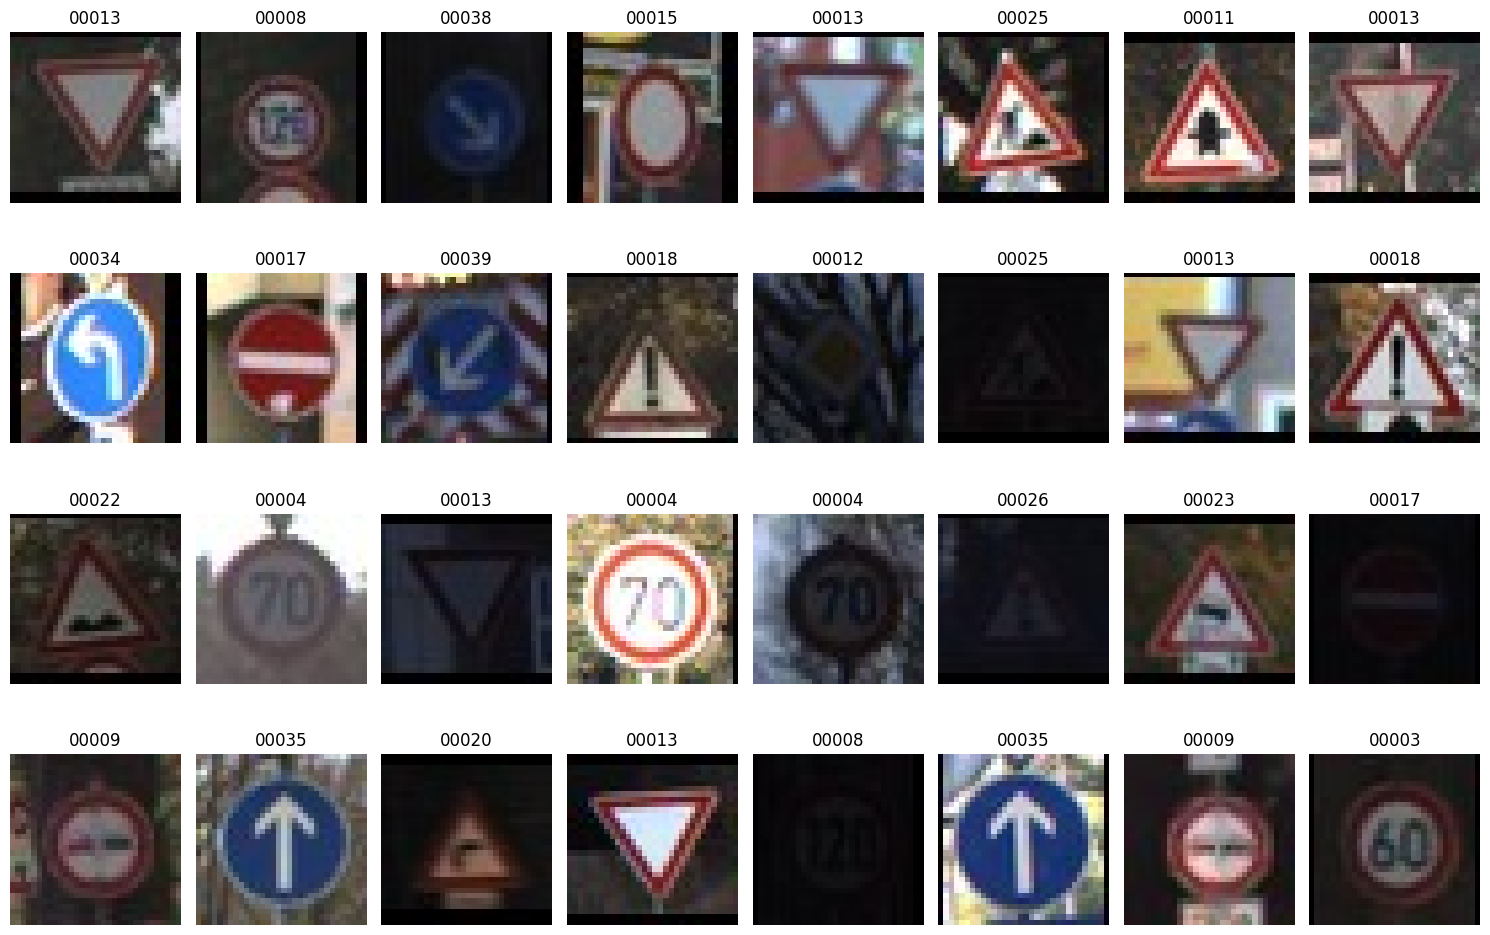

In [92]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid


class_names = dataset.classes

# Get one batch of images and labels from the trainloader
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Unnormalize the images for display
images = images * 0.5 + 0.5  # Reverse normalization

# Create a grid of images
grid_size = (4, 8)  # 4 rows and 8 columns
fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(15, 10))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Plot each image in the grid
for img, label, ax in zip(images, labels, axes):
    ax.imshow(img.permute(1, 2, 0))  # Convert from CHW to HWC
    ax.set_title(class_names[label])  # Display the class name
    ax.axis("off")

# Hide any unused subplots
for ax in axes[len(images):]:
    ax.axis("off")

plt.tight_layout()
plt.show()

In [93]:
import torch.nn as nn


class Discriminator(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Discriminator, self).__init__()

        self.fc_1 = nn.Linear(input_dim, hidden_dim)
        self.fc_2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc_out  = nn.Linear(hidden_dim, 1)

        self.LeakyReLU = nn.LeakyReLU(0.2)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.LeakyReLU(self.fc_1(x))
        x = self.LeakyReLU(self.fc_2(x))
        x = self.fc_out(x)
        return x

In [94]:
class Generator(nn.Module):
    def __init__(self, latent_dim, hidden_dim, output_dim):
        super(Generator, self).__init__()
        self.fc_1 = nn.Linear(latent_dim, hidden_dim)
        self.fc_2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc_3 = nn.Linear(hidden_dim, output_dim)

        self.LeakyReLU = nn.LeakyReLU(0.2)

    def forward(self, x):
        h     = self.LeakyReLU(self.fc_1(x))
        h     = self.LeakyReLU(self.fc_2(h))

        x_hat = torch.sigmoid(self.fc_3(h))
        x_hat = x_hat.view([-1, 3, 32, 32])
        return x_hat

In [95]:
import torch.optim as optim


# Models
latent_dim = 32
generator = Generator(latent_dim=latent_dim, hidden_dim=256, output_dim=3072).to(device)
discriminator = Discriminator( hidden_dim=256, input_dim=3072).to(device)

# Optimizers
generator_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0001)
generator_scheduler = optim.lr_scheduler.ExponentialLR(optimizer=generator_optimizer, gamma=0.99)
discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.00001)
discriminator_scheduler = optim.lr_scheduler.ExponentialLR(optimizer=discriminator_optimizer, gamma=0.99)

# loss
criterion = nn.MSELoss()

In [96]:
fixed_noise = torch.randn(16, latent_dim,device=device)

Epoch: 0, discrimiantor fake error: 0.613, discriminator real acc: 0.539


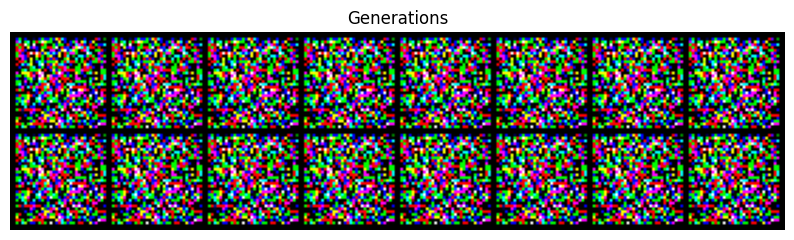

Epoch: 1, discrimiantor fake error: 0.176, discriminator real acc: 0.701
Epoch: 2, discrimiantor fake error: 0.13, discriminator real acc: 0.784
Epoch: 3, discrimiantor fake error: 0.0751, discriminator real acc: 0.851
Epoch: 4, discrimiantor fake error: 0.337, discriminator real acc: 0.91
Epoch: 5, discrimiantor fake error: 0.155, discriminator real acc: 0.807
Epoch: 6, discrimiantor fake error: 0.0733, discriminator real acc: 0.854
Epoch: 7, discrimiantor fake error: 0.0388, discriminator real acc: 0.891
Epoch: 8, discrimiantor fake error: 0.0357, discriminator real acc: 0.922
Epoch: 9, discrimiantor fake error: 0.187, discriminator real acc: 0.923
Epoch: 10, discrimiantor fake error: 0.0646, discriminator real acc: 0.87


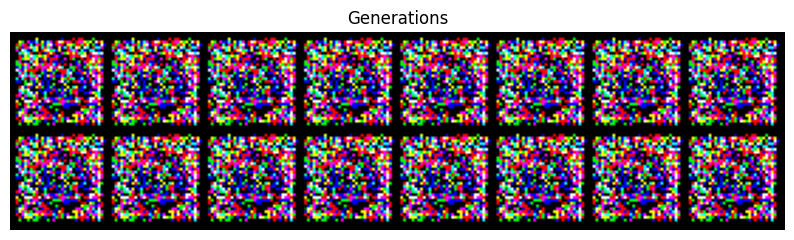

Epoch: 11, discrimiantor fake error: 0.11, discriminator real acc: 0.886
Epoch: 12, discrimiantor fake error: 0.0477, discriminator real acc: 0.895
Epoch: 13, discrimiantor fake error: 0.0228, discriminator real acc: 0.922
Epoch: 14, discrimiantor fake error: 0.0222, discriminator real acc: 0.933
Epoch: 15, discrimiantor fake error: 0.108, discriminator real acc: 0.93
Epoch: 16, discrimiantor fake error: 0.0707, discriminator real acc: 0.901
Epoch: 17, discrimiantor fake error: 0.0918, discriminator real acc: 0.909
Epoch: 18, discrimiantor fake error: 0.064, discriminator real acc: 0.902
Epoch: 19, discrimiantor fake error: 0.0247, discriminator real acc: 0.927
Epoch: 20, discrimiantor fake error: 0.0308, discriminator real acc: 0.942


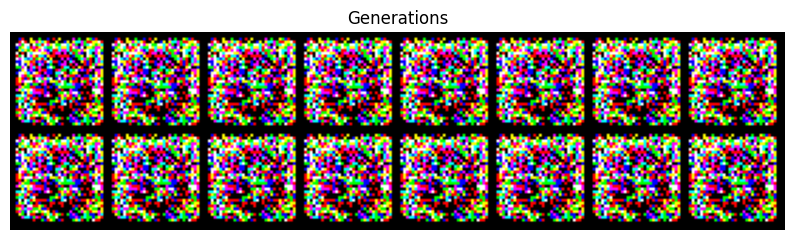

Epoch: 21, discrimiantor fake error: 0.085, discriminator real acc: 0.932
Epoch: 22, discrimiantor fake error: 0.0408, discriminator real acc: 0.922
Epoch: 23, discrimiantor fake error: 0.0742, discriminator real acc: 0.932
Epoch: 24, discrimiantor fake error: 0.0536, discriminator real acc: 0.932
Epoch: 25, discrimiantor fake error: 0.0157, discriminator real acc: 0.942
Epoch: 26, discrimiantor fake error: 0.0119, discriminator real acc: 0.96
Epoch: 27, discrimiantor fake error: 0.0704, discriminator real acc: 0.954
Epoch: 28, discrimiantor fake error: 0.0215, discriminator real acc: 0.943
Epoch: 29, discrimiantor fake error: 0.0211, discriminator real acc: 0.957
Epoch: 30, discrimiantor fake error: 0.0149, discriminator real acc: 0.958


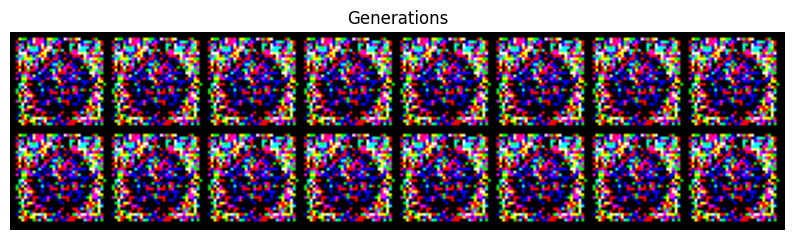

Epoch: 31, discrimiantor fake error: 0.0656, discriminator real acc: 0.958
Epoch: 32, discrimiantor fake error: 0.0398, discriminator real acc: 0.949
Epoch: 33, discrimiantor fake error: 0.00814, discriminator real acc: 0.965
Epoch: 34, discrimiantor fake error: 0.0132, discriminator real acc: 0.967
Epoch: 35, discrimiantor fake error: 0.0541, discriminator real acc: 0.965
Epoch: 36, discrimiantor fake error: 0.0182, discriminator real acc: 0.954
Epoch: 37, discrimiantor fake error: 0.00993, discriminator real acc: 0.969
Epoch: 38, discrimiantor fake error: 0.0152, discriminator real acc: 0.973
Epoch: 39, discrimiantor fake error: 0.019, discriminator real acc: 0.972
Epoch: 40, discrimiantor fake error: 0.0535, discriminator real acc: 0.962


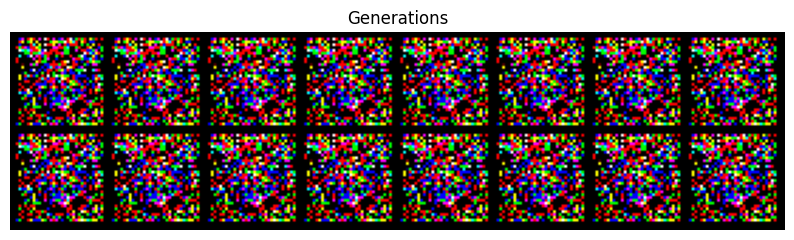

Epoch: 41, discrimiantor fake error: 0.0115, discriminator real acc: 0.967
Epoch: 42, discrimiantor fake error: 0.0111, discriminator real acc: 0.972
Epoch: 43, discrimiantor fake error: 0.0239, discriminator real acc: 0.974
Epoch: 44, discrimiantor fake error: 0.0327, discriminator real acc: 0.967
Epoch: 45, discrimiantor fake error: 0.0169, discriminator real acc: 0.967
Epoch: 46, discrimiantor fake error: 0.0118, discriminator real acc: 0.978
Epoch: 47, discrimiantor fake error: 0.0125, discriminator real acc: 0.975
Epoch: 48, discrimiantor fake error: 0.0205, discriminator real acc: 0.971
Epoch: 49, discrimiantor fake error: 0.0245, discriminator real acc: 0.972
Epoch: 50, discrimiantor fake error: 0.0127, discriminator real acc: 0.976


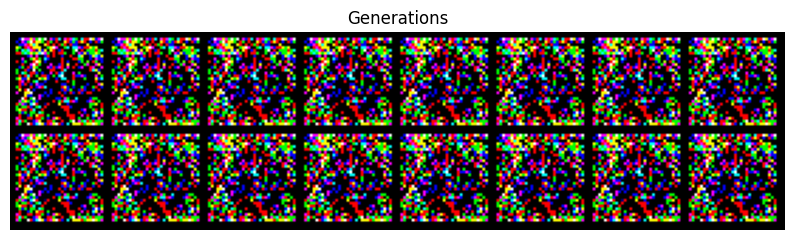

Epoch: 51, discrimiantor fake error: 0.0111, discriminator real acc: 0.981
Epoch: 52, discrimiantor fake error: 0.02, discriminator real acc: 0.974
Epoch: 53, discrimiantor fake error: 0.0211, discriminator real acc: 0.976
Epoch: 54, discrimiantor fake error: 0.0131, discriminator real acc: 0.976
Epoch: 55, discrimiantor fake error: 0.00799, discriminator real acc: 0.978
Epoch: 56, discrimiantor fake error: 0.00863, discriminator real acc: 0.979
Epoch: 57, discrimiantor fake error: 0.016, discriminator real acc: 0.978
Epoch: 58, discrimiantor fake error: 0.0139, discriminator real acc: 0.98
Epoch: 59, discrimiantor fake error: 0.0197, discriminator real acc: 0.979
Epoch: 60, discrimiantor fake error: 0.0089, discriminator real acc: 0.979


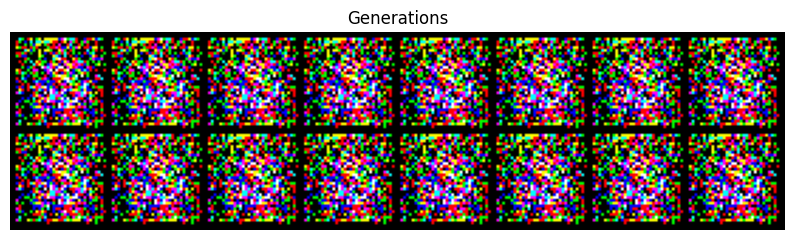

Epoch: 61, discrimiantor fake error: 0.0126, discriminator real acc: 0.982
Epoch: 62, discrimiantor fake error: 0.0238, discriminator real acc: 0.976
Epoch: 63, discrimiantor fake error: 0.014, discriminator real acc: 0.977
Epoch: 64, discrimiantor fake error: 0.00636, discriminator real acc: 0.981
Epoch: 65, discrimiantor fake error: 0.00566, discriminator real acc: 0.983
Epoch: 66, discrimiantor fake error: 0.0311, discriminator real acc: 0.977
Epoch: 67, discrimiantor fake error: 0.033, discriminator real acc: 0.967
Epoch: 68, discrimiantor fake error: 0.0176, discriminator real acc: 0.976
Epoch: 69, discrimiantor fake error: 0.0112, discriminator real acc: 0.98
Epoch: 70, discrimiantor fake error: 0.0176, discriminator real acc: 0.981


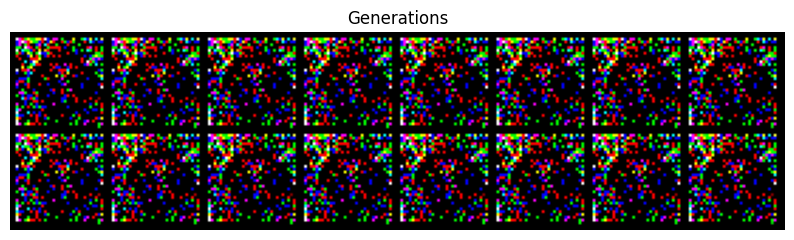

Epoch: 71, discrimiantor fake error: 0.0232, discriminator real acc: 0.979
Epoch: 72, discrimiantor fake error: 0.018, discriminator real acc: 0.98
Epoch: 73, discrimiantor fake error: 0.0136, discriminator real acc: 0.982
Epoch: 74, discrimiantor fake error: 0.0205, discriminator real acc: 0.971
Epoch: 75, discrimiantor fake error: 0.0125, discriminator real acc: 0.973
Epoch: 76, discrimiantor fake error: 0.00771, discriminator real acc: 0.979
Epoch: 77, discrimiantor fake error: 0.0352, discriminator real acc: 0.978
Epoch: 78, discrimiantor fake error: 0.0434, discriminator real acc: 0.956
Epoch: 79, discrimiantor fake error: 0.0179, discriminator real acc: 0.974
Epoch: 80, discrimiantor fake error: 0.0118, discriminator real acc: 0.975


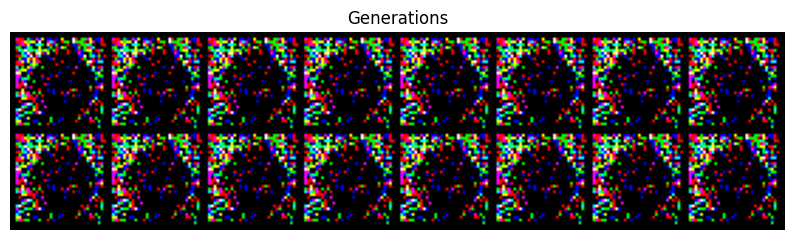

Epoch: 81, discrimiantor fake error: 0.0095, discriminator real acc: 0.982
Epoch: 82, discrimiantor fake error: 0.00995, discriminator real acc: 0.984
Epoch: 83, discrimiantor fake error: 0.0194, discriminator real acc: 0.984
Epoch: 84, discrimiantor fake error: 0.0374, discriminator real acc: 0.972
Epoch: 85, discrimiantor fake error: 0.0157, discriminator real acc: 0.98
Epoch: 86, discrimiantor fake error: 0.011, discriminator real acc: 0.977
Epoch: 87, discrimiantor fake error: 0.00479, discriminator real acc: 0.982
Epoch: 88, discrimiantor fake error: 0.00301, discriminator real acc: 0.983
Epoch: 89, discrimiantor fake error: 0.00323, discriminator real acc: 0.984
Epoch: 90, discrimiantor fake error: 0.00355, discriminator real acc: 0.982


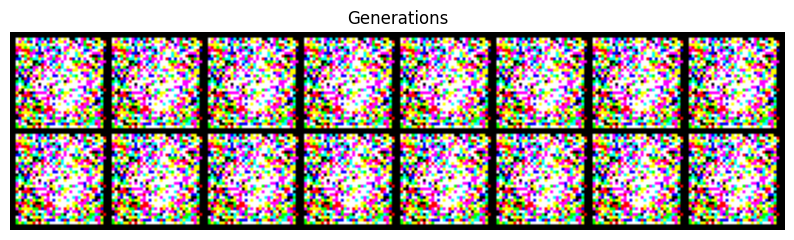

Epoch: 91, discrimiantor fake error: 0.00778, discriminator real acc: 0.985
Epoch: 92, discrimiantor fake error: 0.057, discriminator real acc: 0.965
Epoch: 93, discrimiantor fake error: 0.0151, discriminator real acc: 0.979
Epoch: 94, discrimiantor fake error: 0.0112, discriminator real acc: 0.98
Epoch: 95, discrimiantor fake error: 0.0121, discriminator real acc: 0.985
Epoch: 96, discrimiantor fake error: 0.0112, discriminator real acc: 0.981
Epoch: 97, discrimiantor fake error: 0.0106, discriminator real acc: 0.982
Epoch: 98, discrimiantor fake error: 0.0263, discriminator real acc: 0.982
Epoch: 99, discrimiantor fake error: 0.0283, discriminator real acc: 0.976


In [97]:
import numpy as np


G_losses = []
D_losses = []
num_epochs = 100
for epoch in range(num_epochs):
    # For each batch in the dataloader
    discriminator_fake_acc = []
    discriminator_real_acc = []
    for i, data in enumerate(train_loader, 0):
        if i % 10 == 0:
            ############################
            # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
            ###########################
            ## Train with all-real batch
            discriminator_optimizer.zero_grad()
            # Format batch
            real_images = data[0].to(device)
            b_size = real_images.size(0)
            label = torch.ones((b_size,), dtype=torch.float, device=device) # Setting labels for real images
            # Forward pass real batch through D
            output = discriminator(real_images).view(-1)
            # Calculate loss on all-real batch
            error_discriminator_real = criterion(output, label)
            # Calculate gradients for D in backward pass
            discriminator_real_acc.append(output.mean().item())

            ## Train with all-fake batch
            # Generate batch of latent vectors
            noise = torch.randn(b_size, latent_dim,device=device)
            # Generate fake image batch with Generator
            fake_images = generator(noise)
            label_fake = torch.zeros((b_size,), dtype=torch.float, device=device)
            # Classify all fake batch with Discriminator
            output = discriminator(fake_images.detach()).view(-1)
            # Calculate D's loss on the all-fake batch
            error_discriminator_fake = criterion(output, label_fake)
            # Calculate the gradients for this batch, accumulated (summed) with previous gradients
            discriminator_fake_acc.append(output.mean().item())
            # Compute error of D as sum over the fake and the real batches
            error_discriminator = error_discriminator_real + error_discriminator_fake
            error_discriminator.backward()
            # Update D
            discriminator_optimizer.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        generator_optimizer.zero_grad()
        # Regenerate fake images for generator training
        noise = torch.randn(b_size, latent_dim, device=device)
        fake_images = generator(noise)
        label = torch.ones((b_size,), dtype=torch.float, device=device)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = discriminator(fake_images).view(-1)
        # Calculate G's loss based on this output
        error_generator = criterion(output, label)
        # Calculate gradients for G
        error_generator.backward()
        D_G_z2 = output.mean().item()
        # Update G
        generator_optimizer.step()

        # Output training stats
        # Save Losses for plotting later
        G_losses.append(error_generator.item())
        D_losses.append(error_discriminator.item())

    print(f"Epoch: {epoch}, discrimiantor fake error: {np.mean(discriminator_fake_acc):.3}, discriminator real acc: {np.mean(discriminator_real_acc):.3}")
    generator_scheduler.step()
    discriminator_scheduler.step()
    if epoch % 10 == 0:
        with torch.no_grad():
            fake = generator(fixed_noise).detach().cpu()
        grid = torchvision.utils.make_grid(fake)
        grid = grid.permute(1, 2, 0)
        plt.figure(figsize=(10,10))
        plt.title(f"Generations")
        plt.imshow(grid)
        plt.axis('off')
        plt.show()

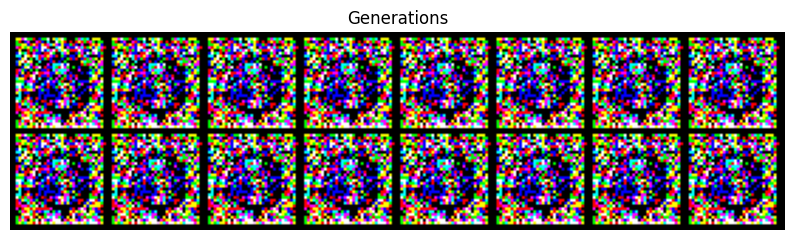

In [98]:
with torch.no_grad():
    fake = generator(fixed_noise).detach().cpu()
grid = torchvision.utils.make_grid(fake)
grid = grid.permute(1, 2, 0)
plt.figure(figsize=(10,10))
plt.title(f"Generations")
plt.imshow(grid)
plt.axis('off')
plt.show()

In [99]:
with torch.no_grad():
    fixed_noise = torch.randn(1000, latent_dim,device=device)
    generations_gan = generator(fixed_noise)

In [113]:
orig_data = torch.stack([x[0] for x in list(valid_subset)[:1000]])
orig_data = orig_data.view(-1, 3*32*32)

In [114]:
from evaluator import Evaluator


evaluator = Evaluator(3*32*32, 512).to(device)
evaluator.load_state_dict(torch.load("evaluator.pth"))
evaluator.eval()

with torch.no_grad():
    dist_orig_data = evaluator.get_features(orig_data.to(device)).cpu()
    dist_gan = evaluator.get_features(generations_gan.to(device)).cpu()

In [115]:
from fid import calculate_frechet_distance

for name, obj in zip(['orig','gan'],[dist_orig_data.numpy(),dist_gan.numpy()]):
    print(f"FD {name}: {calculate_frechet_distance(dist_orig_data.numpy(),obj)}")

FD orig: -8.585629984736443e-10
FD gan: 25713.310966673595


In [120]:
torch.save(generator.state_dict(), "gan.pth")